In [1]:
# 任务：通过时序特征预测平安银行的股价
# 背景（为什么选择时序特征）：在有效市场假说下，股价应该与外部的因素无关，因而只能从自身的状态入手分析
import pandas as pd
from scutquant import scutquant as q

df = pd.read_excel('D:/Desktop/py_csv/平安银行.xlsx')
df.set_index(['time_tick'], inplace=True)

In [2]:
df = df[['price']]
df['return'] = q.price2ret(df['price'], shift1=0, shift2=-1)  # return = price_-1 / price_0 - 1, 意为T+1对T的收益率
df = q.clean(df)
df.describe()

,price,return
count,19185.000000,19185.000000
mean,19.035295,-0.000003
std,0.384733,0.000588
min,18.309999,-0.005198
25%,18.670000,-0.000514
50%,19.250000,0.000000
75%,19.350000,0.000510
max,20.030001,0.005949


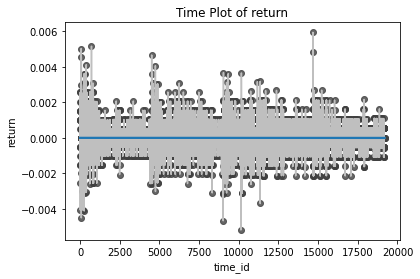

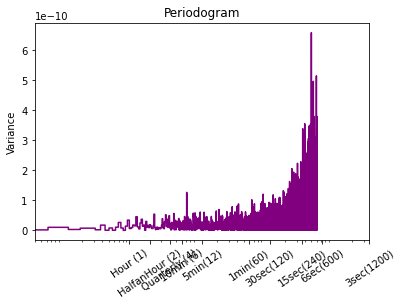

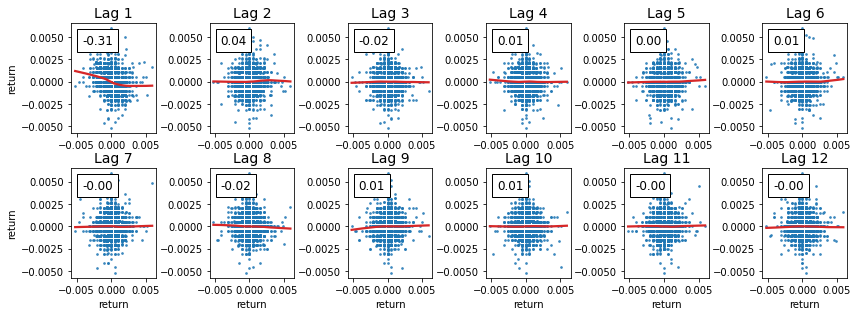

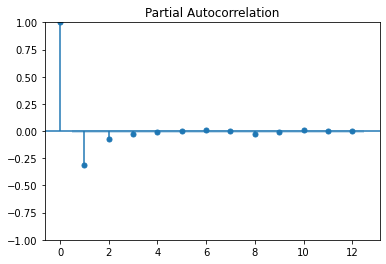

In [3]:
# 时间序列ts可视为由四部分组成: trend, 趋势, 形式为随着样本数量增加的哑变量; seasonality, 季节性, 形式上为傅里叶特征：
# 假设时间为t, 频率为f, 则特征 k = (2 * pi / f) * t. 由周期图(紫色)确定频率和阶数；cycle, 周期性, 形式上为目标值的滞后项, 
# 意为当前值与过去值相关(随着时间变化，当前值会回到过去某个时间的状态), 可通过自相关性确定; error，随机误差，无法建模
q.auto_ts_ana(df, 'return', windows=20, freq='3sec', lags=12)

In [4]:
df = q.make_trend(df, order=1)  # 构建趋势特征
df = q.make_fourier_features(df, freq=240, order=4)  # 构建季节特征
df = q.make_lags(df, data=df['return'], lags=3)  # 构建周期特征
print(df.head(5))

                         price    return  trend  sin_240_1  cos_240_1  \
time_tick                                                               
2021-08-23 09:30:03  19.480000 -0.000513    1.0   0.000000   1.000000   
2021-08-23 09:30:06  19.469999  0.002568    2.0   0.026177   0.999657   
2021-08-23 09:30:09  19.520000  0.001025    3.0   0.052336   0.998630   
2021-08-23 09:30:12  19.540001  0.002559    4.0   0.078459   0.996917   
2021-08-23 09:30:15  19.590000  0.001531    5.0   0.104528   0.994522   

                     sin_240_2  cos_240_2  sin_240_3  cos_240_3  sin_240_4  \
time_tick                                                                    
2021-08-23 09:30:03   0.000000   1.000000   0.000000   1.000000   0.000000   
2021-08-23 09:30:06   0.052336   0.998630   0.078459   0.996917   0.104528   
2021-08-23 09:30:09   0.104528   0.994522   0.156434   0.987688   0.207912   
2021-08-23 09:30:12   0.156434   0.987688   0.233445   0.972370   0.309017   
2021-08-23 09:30:15 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19185 entries, 2021-08-23 09:30:03 to 2021-08-27 14:59:47
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      19185 non-null  float64
 1   return     19185 non-null  float64
 2   trend      19185 non-null  float64
 3   sin_240_1  19185 non-null  float32
 4   cos_240_1  19185 non-null  float32
 5   sin_240_2  19185 non-null  float32
 6   cos_240_2  19185 non-null  float32
 7   sin_240_3  19185 non-null  float32
 8   cos_240_3  19185 non-null  float32
 9   sin_240_4  19185 non-null  float32
 10  cos_240_4  19185 non-null  float32
 11  sin_1      19184 non-null  float64
 12  sin_2      19183 non-null  float64
 13  sin_3      19182 non-null  float64
dtypes: float32(8), float64(6)
memory usage: 2.2 MB
None
X_mis= 0.0022338880822070813
clean dataset done 

pop label done 

label norm done 



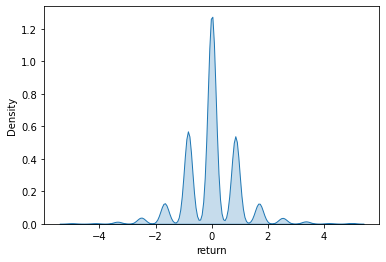

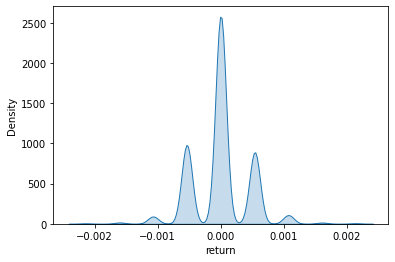

price        2.097199
sin_1        1.194322
trend        1.181804
sin_2        0.795096
sin_3        0.739352
cos_240_4    0.006171
sin_240_4    0.000000
cos_240_3    0.000000
sin_240_3    0.000000
cos_240_2    0.000000
sin_240_2    0.000000
cos_240_1    0.000000
sin_240_1    0.000000
Name: MI Scores, dtype: float64
count    13.000000
mean      0.462611
std       0.684230
min       0.000000
25%       0.000000
50%       0.000000
75%       0.795096
max       2.097199
Name: MI Scores, dtype: float64
sin_240_4 will be dropped
cos_240_3 will be dropped
sin_240_3 will be dropped
cos_240_2 will be dropped
sin_240_2 will be dropped
cos_240_1 will be dropped
sin_240_1 will be dropped
norm data done 

all works done 



,trend,cos_240_4,sin_1,sin_2,sin_3
time_tick,,,,,
2021-08-27 10:05:39,1.731881,0.149017,0.862990,-0.855211,0.003320
2021-08-27 10:05:42,1.732107,0.295259,-1.714451,0.862311,-0.855214
2021-08-27 10:05:45,1.732333,0.438276,0.863447,-1.713743,0.862311
2021-08-27 10:05:48,1.732559,0.576345,0.003538,0.862768,-1.713748
2021-08-27 10:05:51,1.732785,0.708273,0.003538,0.003322,0.862767
...,...,...,...,...,...
2021-08-27 14:59:02,2.597201,-0.830115,0.003538,0.003322,0.003320
2021-08-27 14:59:11,2.597427,-0.706077,0.003538,0.003322,0.003320
2021-08-27 14:59:20,2.597653,-0.574149,0.003538,0.003322,0.003320


In [5]:
# 拆分数据集、筛选特征和标准化(这里关掉了PCA功能, 因为样本有限的情况下PCA的效果不好)
x_train, x_test, y_train, y_test, ymean, ystd = q.auto_process(df, y='return', norm='z', orth=False)
x_train.drop('price', axis=1)  # 仅用纯时序特征
x_test.drop('price', axis=1)

In [6]:
# 使用岭回归拟合数据
model = q.auto_lrg(x_train, y_train, method='ridge')

ridge method will be used


In [7]:
pred = model.predict(x_test)
pred = pd.Series(pred, index=x_test.index)
pred += ymean
pred *= ystd
print(pred.head(5))
print(y_test.head(5))

time_tick
2021-08-27 10:05:39   -0.000148
2021-08-27 10:05:42    0.000324
2021-08-27 10:05:45   -0.000120
2021-08-27 10:05:48   -0.000021
2021-08-27 10:05:51   -0.000022
dtype: float64
time_tick
2021-08-27 10:05:39   -0.001063
2021-08-27 10:05:42    0.000532
2021-08-27 10:05:45    0.000000
2021-08-27 10:05:48    0.000000
2021-08-27 10:05:51    0.000000
Name: return, dtype: float64


In [8]:
# 使用pearson相关系数评价拟合优度
r_return = q.pearson_corr(pred, y_test)
r_return

0.39166367516802497

In [9]:
# 获得预测的股价和真实股价(都是T+1的价格)
price_ = df[df.index.isin(x_test.index)]['price']
df_ = pd.DataFrame({'predict':pred, 'price':price_}, index=x_test.index)
df_['price_forecast'] = df_['predict'] * df_['price'] + df_['price']  # price_-1 = price_0 + return * price_0
df_['real_price'] = df_['price'].shift(-1)
df_ = df_.dropna()
df_

,predict,price,price_forecast,real_price
time_tick,,,,
2021-08-27 10:05:39,-0.000148,18.820000,18.817213,18.799999
2021-08-27 10:05:42,0.000324,18.799999,18.806095,18.809999
2021-08-27 10:05:45,-0.000120,18.809999,18.807748,18.809999
2021-08-27 10:05:48,-0.000021,18.809999,18.809603,18.809999
2021-08-27 10:05:51,-0.000022,18.809999,18.809584,18.809999
...,...,...,...,...
2021-08-27 14:58:53,0.000001,18.379999,18.380022,18.379999
2021-08-27 14:59:02,0.000001,18.379999,18.380027,18.379999
2021-08-27 14:59:11,0.000002,18.379999,18.380032,18.379999


In [10]:
r_price = q.pearson_corr(df_['price_forecast'], df_['real_price'])
r_price

0.9986837207290048

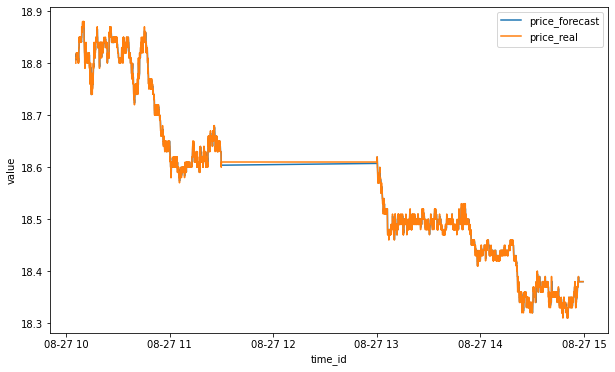

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_['price_forecast'], label='price_forecast')
plt.plot(df_['real_price'], label='price_real')
plt.xlabel('time_id')
plt.ylabel('value')
plt.legend()
plt.show()